In [1]:
import os, joblib, pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn

DATA_DIR = os.path.join('.', 'dataset')          # adjust if necessary
MODEL_OUT = os.path.join(DATA_DIR, '..', 'ada_ripeness_stage5.pkl')
FEATURE_LIST_OUT = os.path.join(DATA_DIR, '..', 'model_features.txt')
RANDOM_STATE = 42

In [2]:
X_train = pd.read_csv(f'{DATA_DIR}/X_train_pre.csv', index_col=0)
y_train = pd.read_csv(f'{DATA_DIR}/y_train_pre.csv', index_col=0)['label']

X_val   = pd.read_csv(f'{DATA_DIR}/X_test_pre.csv',  index_col=0)
y_val   = pd.read_csv(f'{DATA_DIR}/y_test_pre.csv',  index_col=0)['label']

print('Train shape:', X_train.shape, '  Val shape:', X_val.shape)

Train shape: (18819, 18)   Val shape: (8066, 18)


In [3]:
le = LabelEncoder()
y_tr_enc = le.fit_transform(y_train)   # 1‑5 → 0‑4
y_val_enc = le.transform(y_val)
n_classes = len(le.classes_)

In [4]:
base_tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=30,
    random_state=RANDOM_STATE
)

ada = AdaBoostClassifier(
    estimator     = base_tree,
    n_estimators  = 500,
    learning_rate = 0.05,
    random_state  = RANDOM_STATE
)

ada.fit(X_train, y_tr_enc)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_leaf=30,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500, random_state=42)

Weighted‑F1: 0.9709570995394736
              precision    recall  f1-score   support

           1       0.98      0.94      0.96      1613
           2       0.93      0.98      0.95      1613
           3       1.00      0.98      0.99      1613
           4       0.97      0.99      0.98      1613
           5       0.99      0.97      0.98      1614

    accuracy                           0.97      8066
   macro avg       0.97      0.97      0.97      8066
weighted avg       0.97      0.97      0.97      8066



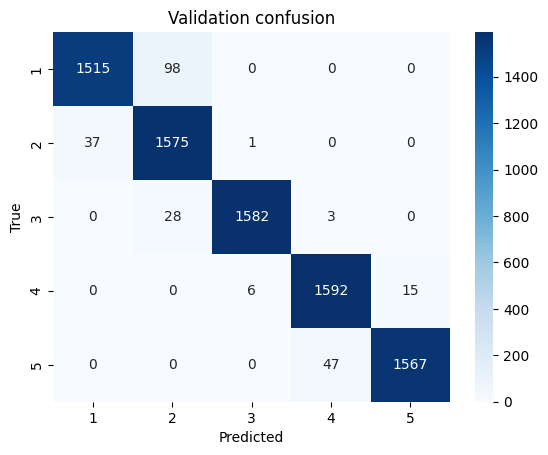

In [5]:
y_pred_enc = ada.predict(X_val)
y_pred = le.inverse_transform(y_pred_enc)   # back to original labels (1‑5)

print('Weighted‑F1:', f1_score(y_val, y_pred, average='weighted'))
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Validation confusion');
plt.show()

In [6]:
joblib.dump({'model': ada, 'label_encoder': le}, MODEL_OUT)
with open(FEATURE_LIST_OUT, 'w') as f:
    for col in X_train.columns:
        f.write(col + '\n')

print('✅  Model saved →', MODEL_OUT)
print('Feature list saved →', FEATURE_LIST_OUT)

✅  Model saved → .\dataset\..\ada_ripeness_stage5.pkl
Feature list saved → .\dataset\..\model_features.txt
